# MACHINE GAZING🤖👁️‍🗨️✨

In [10]:
import matplotlib.pyplot as plt
import numpy as np




In [11]:
import pandas as pd
import seaborn as sns


In [14]:
#read data set as pd
df= pd.read_csv("../output/Peak_scenes_merged.tsv", sep='\t')

In [16]:
# Define the new bin edges and labels
df["episode_short"] = df["episode"].str.extract(r'(s\d+e\d+)', expand=False).str.upper()
conditions = [
    df['p'] == 1,
    df['p'] == 2,
    df['p'] == 3,
    df['p'] > 3
]
labels = ['1', '2', '3', '>3']

df['p_bin'] = np.select(conditions, labels, default='other') 

# Group by episode and binned p values, then count
frame_counts = df.groupby(['episode_short', 'p_bin'], observed=True).size().unstack(fill_value=0)

# Normalize to get the proportion of each p-bin per episode
frame_proportions = frame_counts.div(frame_counts.sum(axis=1), axis=0)

# HEIGHT POSITION DENSITY (pixel space)

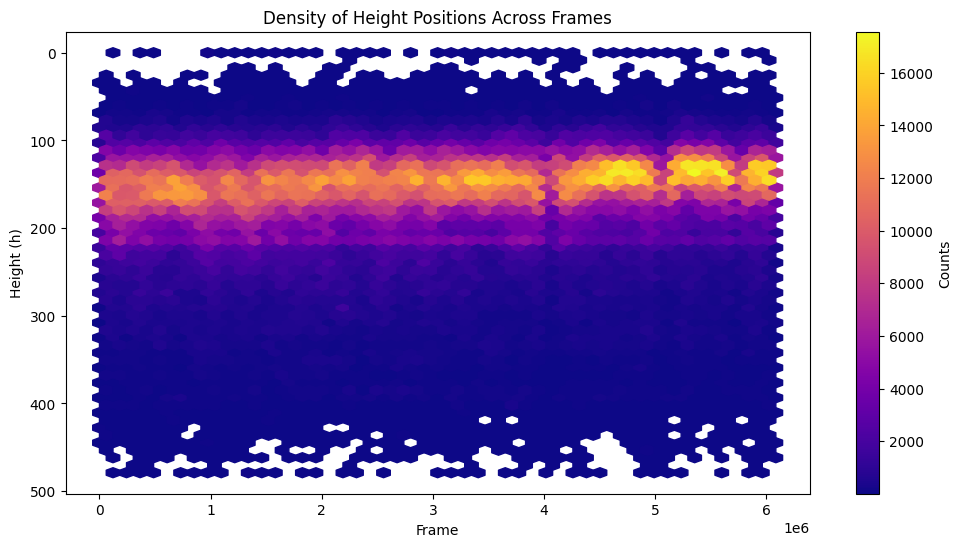

In [21]:
# plot for Density of Height Positions Across Frames
plt.figure(figsize=(12, 6))
plt.hexbin(df["frame"], df["h"], gridsize=50, cmap="plasma", mincnt=1)
plt.gca().invert_yaxis()
plt.colorbar(label="Counts")
plt.xlabel("Frame")
plt.ylabel("Height (h)")
plt.title("Density of Height Positions Across Frames")
plt.show()


# WIDTH POSITION DENSITY (pixel space)

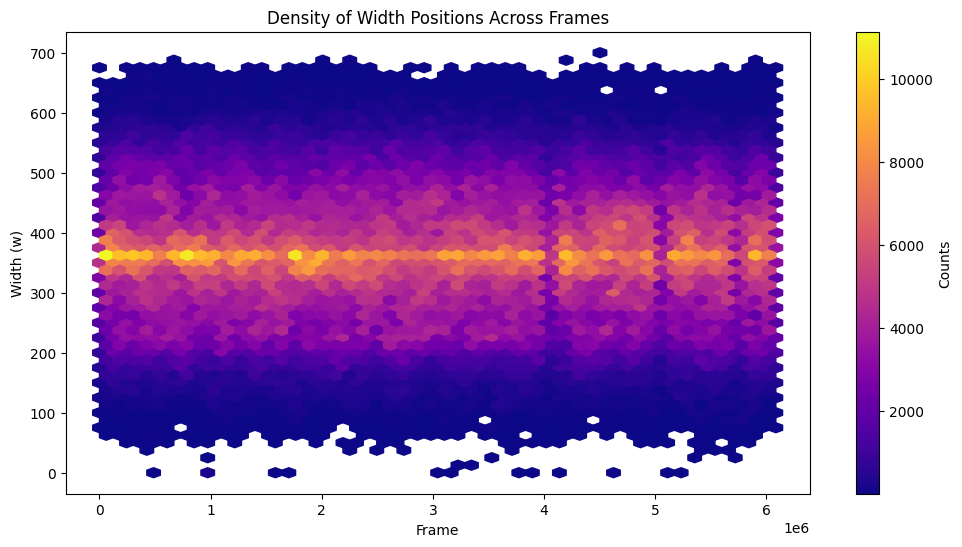

In [22]:
# plot for Density of width Positions Across Frames
plt.figure(figsize=(12, 6))
plt.hexbin(df["frame"], df["w"], gridsize=50, cmap="plasma", mincnt=1)
plt.colorbar(label="Counts")
plt.xlabel("Frame")
plt.ylabel("Width (w)")
plt.title("Density of Width Positions Across Frames")
plt.show()


In [23]:
# get stats on h and w depending on the scene_number
scene_stats = df.groupby(["episode_short", "global_scene_number"]).agg({
    "h": ["mean", "std", "min", "max"],
    "w": ["mean", "std", "min", "max"]
}).reset_index()

# Optional: flatten multi-level columns
scene_stats.columns = ["episode_short", "global_scene_number", "h_mean", "h_std", "h_min", "h_max",
                       "w_mean", "w_std", "w_min", "w_max"]


# HEIGHT AND WIDTH DISTRIBUTION (pixel space)

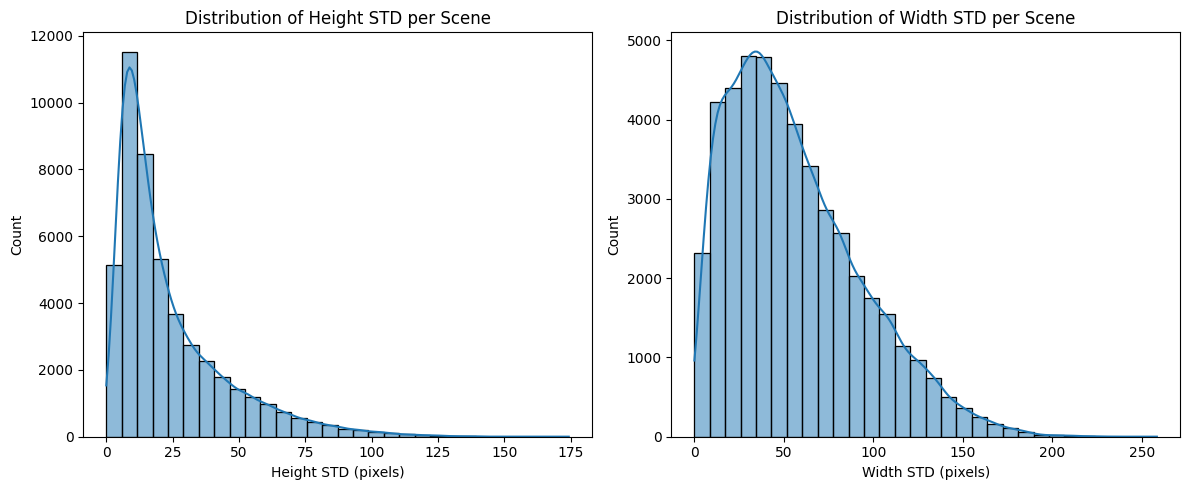

In [24]:
#plot to show distribution of how much coordinates in scenes vary 
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(scene_stats["h_std"], bins=30, kde=True)
plt.title("Distribution of Height STD per Scene")
plt.xlabel("Height STD (pixels)")

plt.subplot(1,2,2)
sns.histplot(scene_stats["w_std"], bins=30, kde=True)
plt.title("Distribution of Width STD per Scene")
plt.xlabel("Width STD (pixels)")

plt.tight_layout()
plt.show()


# GAZE DENSITY IN PIXEL SPACE

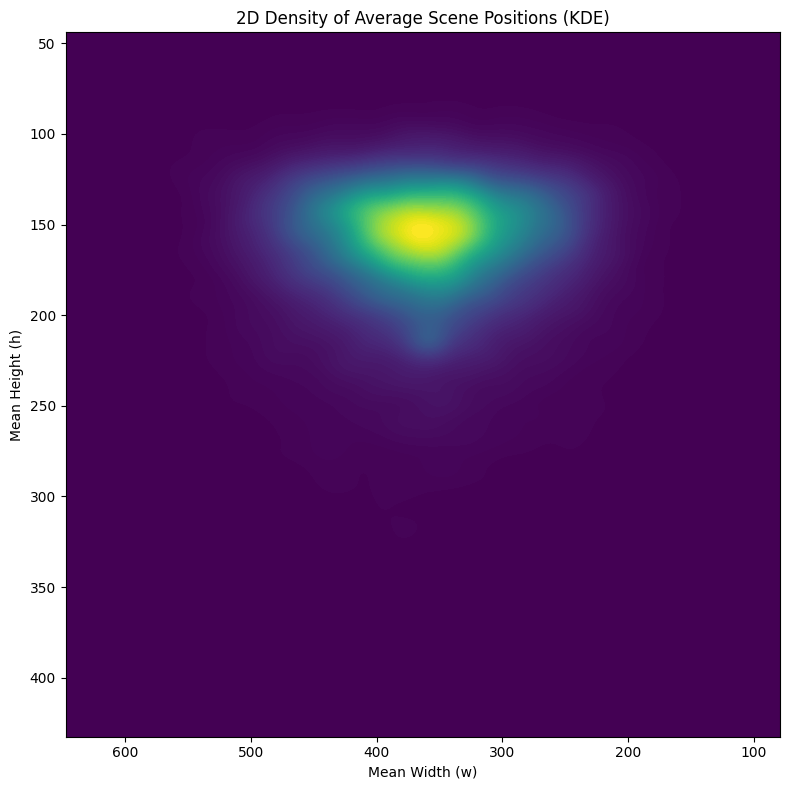

In [26]:


plt.figure(figsize=(8, 8))
sns.kdeplot(
    x=scene_stats["w_mean"], 
    y=scene_stats["h_mean"], 
    fill=True,  # fill the contours
    cmap="viridis",
    thresh=0,   # show full density (no threshold)
    levels=100  # number of contour levels (smoothness/detail)
)

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title("2D Density of Average Scene Positions (KDE)")
plt.xlabel("Mean Width (w)")
plt.ylabel("Mean Height (h)")
plt.tight_layout()
plt.show()
